# Project on Avocado Dataset

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [2]:
# Importing the data and creating the data frame

url = 'https://raw.githubusercontent.com/ritwiksinha53/Internship/main/First_Phase_Evaluation_Projects/avocado.csv'
avocado_df = pd.read_csv(url, sep=',')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Statstical Analysis of the data frame

avocado_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [4]:
# Calcuating null values in the data, outcome shows there are no null values in the data

avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
# Shape of the data frame, 18249 shows number of rows and 14 shows number of columns

avocado_df.shape

(18249, 14)

In [6]:
# However, Unnamed: 0 and Date column does not help to provide any detail about the data, thus dropping Unnamed: 0 and Date (due to the presence of year, it doesn't affect much to other variables)

avocado_df.drop(['Unnamed: 0', 'Date'], axis=1, inplace=True)

<ipython-input-7-24b671ad91c9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(avocado_df.corr())


<Axes: >

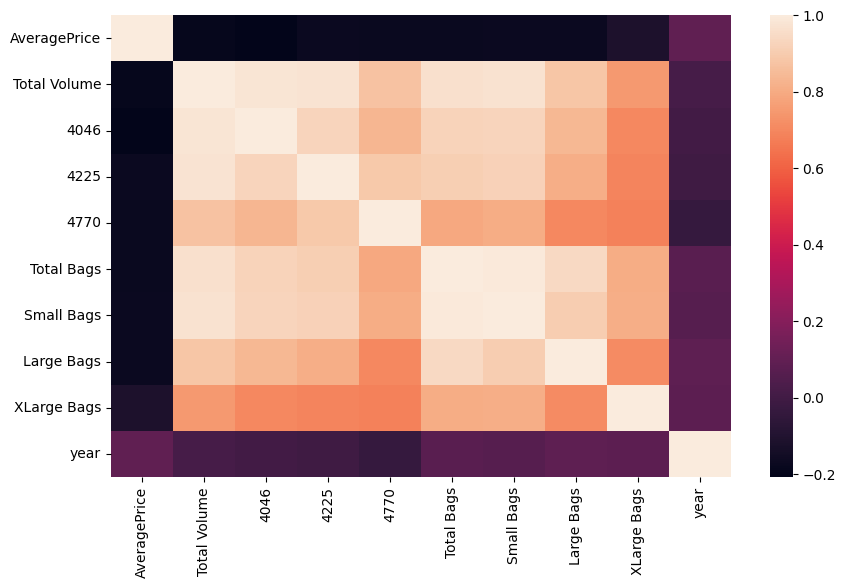

In [7]:
# Building the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(avocado_df.corr())

In [8]:
# From the correlation plot, and the given project description there are columns namely Total Bags, Small Bags, Large Bags, and XLarge Bags are not affecting the target variable, thus dropping all of them
# Target variable for Classification is Region and for Regression is Average Price

avocado_df.drop(['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1, inplace=True)

<ipython-input-9-c46622aa0701>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(avocado_df.corr())


<Axes: >

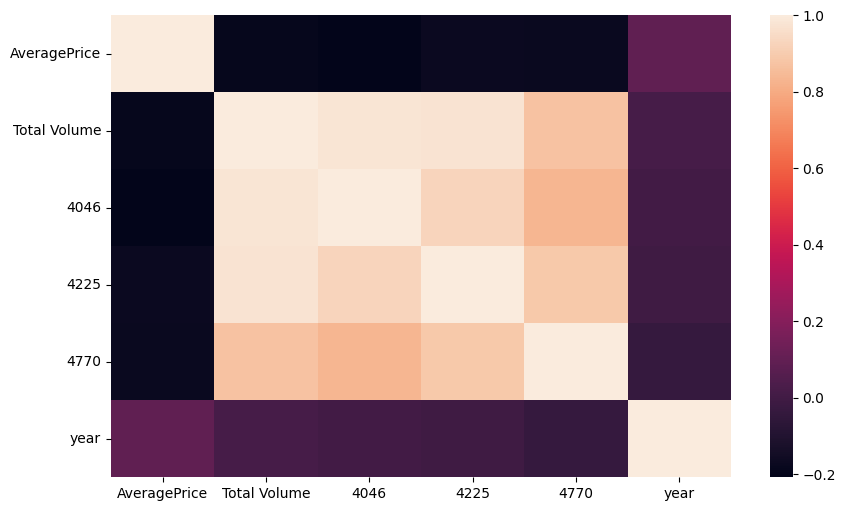

In [9]:
# Building the correlation matrix again

plt.figure(figsize=(10, 6))
sns.heatmap(avocado_df.corr())

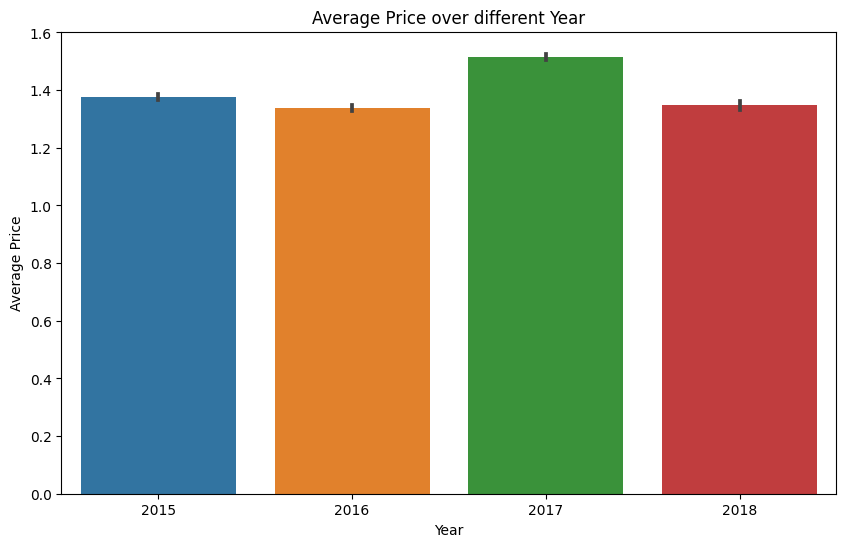

In [ ]:
# Analyzing how "Average Price" of Avocado changes due to change in "Year"

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='AveragePrice', data=avocado_df)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price over different Year')
plt.show()

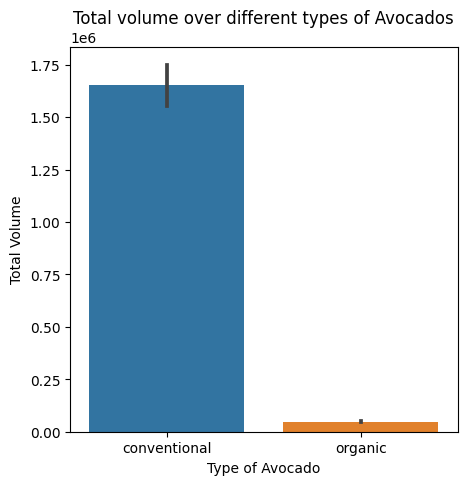

In [ ]:
# Analyzing how "Average Price" of Avocado changes due to change in "Year"

plt.figure(figsize=(5, 5))
sns.barplot(x='type', y='Total Volume', data=avocado_df)
plt.xlabel('Type of Avocado')
plt.ylabel('Total Volume')
plt.title('Total volume over different types of Avocados')
plt.show()

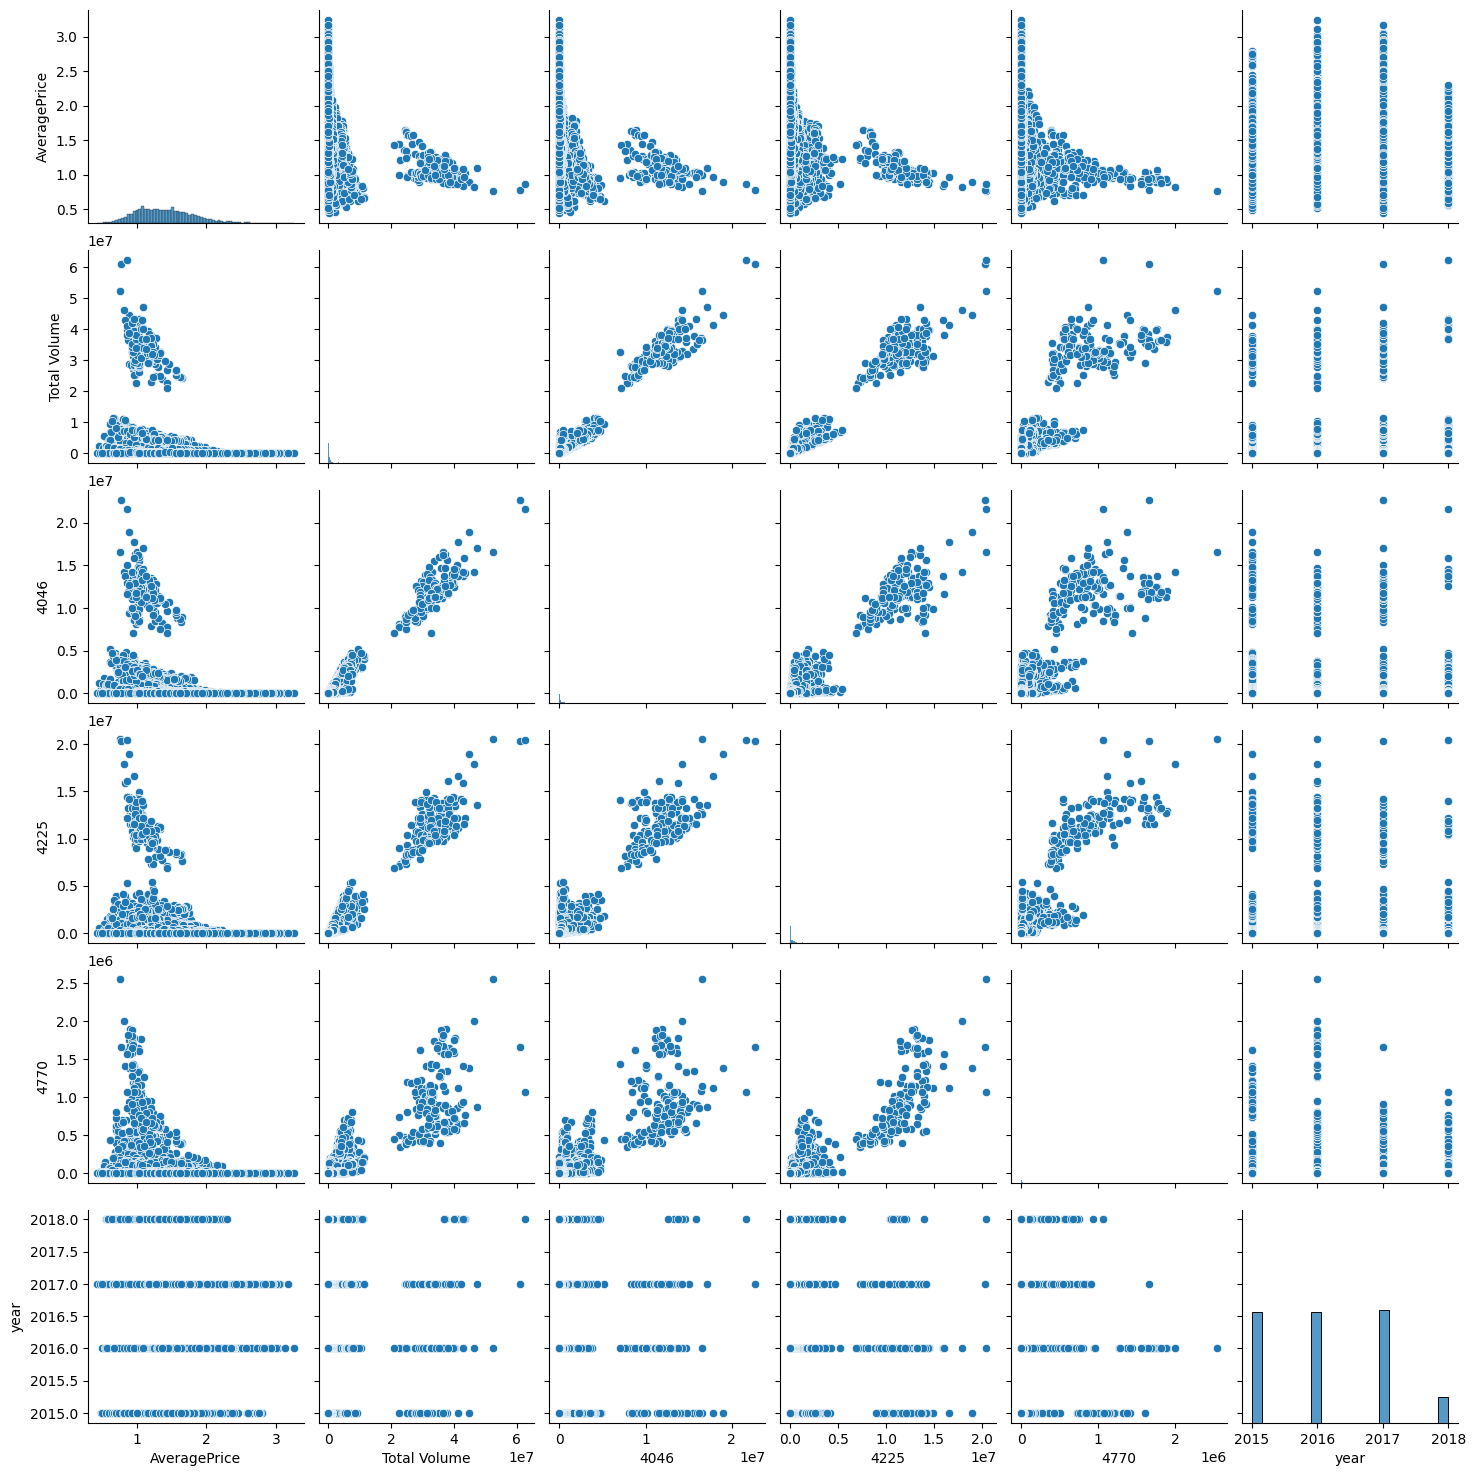

In [ ]:
# Pairplot to understand the correlation between every numerical variable with each other

sns.pairplot(avocado_df)
plt.show()

In [10]:
# Since, we need to create two Machine Learning models, so let's copy the data frame, for using the second one later

avocado_df_2 = avocado_df.copy()
avocado_df_2.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


# Case - 1: Regression Model where tareget variable is Average Price

In [ ]:
# Let's push the target variable at the end of the data frame

cols = list(avocado_df.columns)
cols.append(cols.pop(0))
avocado_df = avocado_df[cols]
avocado_df.head()

,Total Volume,4046,4225,4770,type,year,region,AveragePrice
0,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,1.33
1,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,1.35
2,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,0.93
3,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,1.08
4,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,1.28


In [ ]:
# Dummy encoding to the categorical columns

encoded_df = pd.get_dummies(avocado_df, columns=['type', 'region'])

In [ ]:
encoded_df.head()

,Total Volume,4046,4225,4770,year,AveragePrice,type_conventional,type_organic,region_Albany,region_Atlanta,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,1036.74,54454.85,48.16,2015,1.33,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,54876.98,674.28,44638.81,58.33,2015,1.35,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,118220.22,794.70,109149.67,130.50,2015,0.93,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,78992.15,1132.00,71976.41,72.58,2015,1.08,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51039.60,941.48,43838.39,75.78,2015,1.28,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Extracting the independent and dependent variables

X = encoded_df.drop('AveragePrice', axis=1)
y = encoded_df['AveragePrice']

In [ ]:
# Dependent variable which is our target variable

y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)
y_pred

array([1.71168722, 1.02259936, 1.28743054, ..., 1.25657394, 1.22407124,
       1.75676491])

In [ ]:
# Evaluation metrics for determining the model performance

print("Mean Squarerd Error :", mean_squared_error(y_test, y_pred))
print()
print("R Sqaure :", r2_score(y_test, y_pred))
print()
print("Model Coefficient :", regressor.coef_)
print()
print("Model Intercept :", regressor.intercept_)
print()
print("Explained Variance Score :", explained_variance_score(y_test, y_pred))
print()
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print()
print("Median Absolute Error :", median_absolute_error(y_test, y_pred))

Mean Squarerd Error : 0.07046269318376844

R Sqaure : 0.5661807331948514

Model Coefficient : [ 7.15220311e-09 -6.93033654e-09 -2.61714143e-08  4.03434624e-08
  3.94304873e-02 -2.44791933e-01  2.44791961e-01  1.48702667e-01
 -7.14884243e-02  1.29864634e-01 -6.05080844e-02  1.21333915e-01
  1.22947690e-01 -3.24168927e-03  2.01940087e-01  1.51536161e-01
 -1.94446145e-01 -1.62385565e-01 -3.19689339e-01 -1.86745868e-01
 -1.22400754e-01  1.04214768e-01 -6.92966546e-02  1.11864675e-01
  4.02908944e-01 -3.46215213e-01 -9.01527499e-02  9.80201226e-02
 -3.59743664e-02 -1.92934969e-01 -1.25075386e-01  7.98594976e-03
  1.74875589e-03 -2.04675212e-01 -1.12170107e-01  3.27144450e-01
  2.20077689e-01  7.55881834e-02  9.04206700e-02  2.17756498e-01
 -1.93387024e-01 -4.63216409e-02  3.26562520e-02 -9.52827766e-02
  1.43182330e-01 -1.13268593e-01 -1.76449133e-01  2.08361442e-01
 -1.30244804e-02  4.00746637e-01  6.46634640e-02 -7.54788813e-03
 -2.99065472e-01 -1.19900739e-02  4.46028521e-02  1.88236277e

# Case - 2: Classification Model where tareget variable is Region

In [11]:
# The data using for this model

avocado_df_2.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


In [12]:
avocado_df_2.drop(['type'], axis=1, inplace=True)

In [ ]:
# Dummy encoding to the categorical column

encoded_df_2 = pd.get_dummies(avocado_df_2, columns=['type'])

In [32]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(avocado_df_2.drop('region',axis=1), avocado_df_2['region'], test_size=0.2, random_state=1111)
X_train.shape,X_test.shape

((14599, 6), (3650, 6))

In [44]:
# Model training and maing predictions

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', C=0.0001, penalty='l2', class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [45]:
# Calculate evaluation metrics

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)

Accuracy: 0.22575342465753426
